In [1]:
from utils.cyclegan_func import create_cyclegan_model
from utils.utils import create_ds

In [2]:
painting_ds, photo_ds = create_ds('Qaajar_portrait/','George_W_Bush/')

cycle_gan_model=create_cyclegan_model()
cycle_gan_model.fit(painting_ds, photo_ds,1)

58/58 [==============================] - 115s 2s/step - qpaintings_gen_loss: 9.1171 - photo_gen_loss: 9.3318 - qpaintings_disc_loss: 0.6392 - photo_disc_loss: 0.6309


In [3]:
a=cycle_gan_model.give_model()

<tf.Tensor: shape=(1, 256, 256, 3), dtype=float32, numpy=
array([[[[ 0.99215686,  0.99215686,  0.99215686],
         [ 0.99215686,  0.99215686,  0.99215686],
         [ 0.99215686,  0.99215686,  0.99215686],
         ...,
         [ 0.99215686,  0.99215686,  0.99215686],
         [ 0.99215686,  0.99215686,  0.99215686],
         [ 0.99215686,  0.99215686,  0.99215686]],

        [[ 0.99215686,  0.99215686,  0.99215686],
         [ 0.99215686,  0.99215686,  0.99215686],
         [ 0.99215686,  0.99215686,  0.99215686],
         ...,
         [ 0.99215686,  0.99215686,  0.99215686],
         [ 0.99215686,  0.99215686,  0.99215686],
         [ 0.99215686,  0.99215686,  0.99215686]],

        [[ 0.99215686,  0.99215686,  0.99215686],
         [ 0.99215686,  0.99215686,  0.99215686],
         [ 0.99215686,  0.99215686,  0.99215686],
         ...,
         [ 0.99215686,  0.99215686,  0.99215686],
         [ 0.99215686,  0.99215686,  0.99215686],
         [ 0.99215686,  0.99215686,  0.9921568

In [10]:
immm=a(next(iter(photo_ds.take(1))), training=False)[0].numpy()

In [11]:
immm = (immm * 127.5 + 127.5).astype(np.uint8)


NameError: name 'np' is not defined

In [3]:
import tensorflow as tf

In [15]:
IMAGE_SIZE = [256, 256]
image_string = tf.io.read_file('George_W_Bush/George_W_Bush_0288.jpg')
image = tf.image.decode_jpeg(image_string, channels=3)
# image = (tf.cast(image, tf.float32) / 127.5) - 1
image = tf.image.resize(image, IMAGE_SIZE, method='nearest')


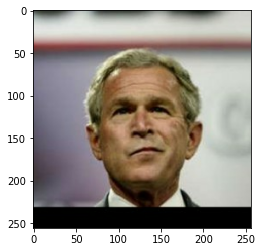

In [16]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [11]:
import os
['George_W_Bush/'+f_ for f_ in os.listdir('George_W_Bush/')]

['George_W_Bush/George_W_Bush_0288.jpg',
 'George_W_Bush/George_W_Bush_0172.jpg',
 'George_W_Bush/George_W_Bush_0512.jpg',
 'George_W_Bush/George_W_Bush_0227.jpg',
 'George_W_Bush/George_W_Bush_0269.jpg',
 'George_W_Bush/George_W_Bush_0123.jpg',
 'George_W_Bush/George_W_Bush_0007.jpg',
 'George_W_Bush/George_W_Bush_0267.jpg',
 'George_W_Bush/George_W_Bush_0175.jpg',
 'George_W_Bush/George_W_Bush_0090.jpg',
 'George_W_Bush/George_W_Bush_0307.jpg',
 'George_W_Bush/George_W_Bush_0521.jpg',
 'George_W_Bush/George_W_Bush_0351.jpg',
 'George_W_Bush/George_W_Bush_0517.jpg',
 'George_W_Bush/George_W_Bush_0499.jpg',
 'George_W_Bush/George_W_Bush_0214.jpg',
 'George_W_Bush/George_W_Bush_0221.jpg',
 'George_W_Bush/George_W_Bush_0304.jpg',
 'George_W_Bush/George_W_Bush_0492.jpg',
 'George_W_Bush/George_W_Bush_0386.jpg',
 'George_W_Bush/George_W_Bush_0427.jpg',
 'George_W_Bush/George_W_Bush_0298.jpg',
 'George_W_Bush/George_W_Bush_0305.jpg',
 'George_W_Bush/George_W_Bush_0330.jpg',
 'George_W_Bush/